In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

tf.enable_eager_execution()
tf.set_random_seed(230)
print(tf.__version__)

from matplotlib import pyplot as plt

import time
import sys
sys.path.append('..')

/Documents/venv3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.1


## Load Hyperparameters

In [2]:
from configs.rnn_biogas import hparams
hparams = hparams()
hparams.learning_rate = 0.001
hparams.units = 32
hparams.target['fields'] = hparams.inp['fields']
vars(hparams)

{'inp': {'fields': [{'name': 'AT305', 'embedding': 1, 'normalise': 2},
   {'name': 'AT303', 'embedding': 1, 'normalise': 2}],
  'start': 0,
  'stop': 9999,
  'length': 120,
  'stride': 1,
  'dim': 5},
 'target': {'fields': [{'name': 'AT305', 'embedding': 1, 'normalise': 2},
   {'name': 'AT303', 'embedding': 1, 'normalise': 2}],
  'start': 120,
  'stop': 10024,
  'length': 24,
  'stride': 1,
  'dim': 1},
 'cond': {'fields': [{'name': 'AT305', 'embedding': 1, 'normalise': 2}],
  'start': 120,
  'stop': 10024,
  'length': 24,
  'stride': 1,
  'dim': 1},
 'batch_size': 800,
 'datagen': 'biogas',
 'lambd': 1e-06,
 'learning_rate': 0.001,
 'logs_path': '/tmp/tensorflow_logs',
 'lr_decay': 0.999,
 'units': 32,
 'norm_epsilon': 1e-12,
 'num_layers': 1,
 'dropout_rate': 0.2,
 'test_split': 0.1,
 'train_split': 0.8,
 'val_split': 0.1}

## Load Data Generator

In [3]:
from data_loader.biogas import load_data
train, val, test = load_data(hparams)
inp, inp_max, inp_min, target, target_max, target_min, cond = next(iter(val))

Instructions for updating:
Colocations handled automatically by placer.


## Define Model

In [5]:
from models.birnn import BiRNN
from trainers.birnn_trainer import train_model

## Train Model

In [6]:
model = BiRNN(hparams)
hparams.learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate = hparams.learning_rate)

In [7]:
train_model(model, train, val, optimizer, hparams)

Instructions for updating:
Use tf.cast instead.
0 :  0.11283 0.15134 [0.05348 0.043   0.00014]
1 :  0.05916 0.05438 [0.01396 0.00965 0.00014]
2 :  0.01902 0.00919 [0.00492 0.00437 0.00013]
3 :  0.02043 0.01205 [0.00385 0.00522 0.00013]
4 :  0.01442 0.01074 [0.00228 0.00083 0.00013]
5 :  0.01368 0.01255 [0.00248 0.00158 0.00013]
6 :  0.01053 0.00777 [0.00082 0.00148 0.00012]
7 :  0.01063 0.00954 [0.00156 0.00243 0.00012]
8 :  0.00802 0.00817 [0.00069 0.00144 0.00012]
9 :  0.00799 0.01017 [0.00168 0.00283 0.00012]


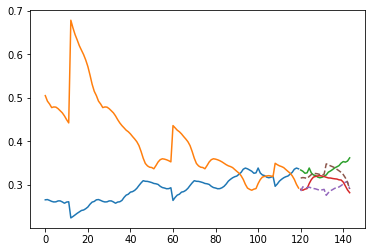

In [8]:
TARGET = 100

model.training = False
pred = model(inp, None)
model.training = True

plt.figure()
plt.plot(range(120), np.reshape(np.transpose(inp[TARGET,:,:5]), (-1)))
plt.plot(range(120), np.reshape(np.transpose(inp[TARGET,:,5:]), (-1)))

plt.plot(range(120, 144), np.array(target)[TARGET])
plt.plot(range(120, 144), np.array(pred[0])[TARGET], '--')
plt.plot(range(120, 144), np.array(pred[1])[TARGET], '--')
plt.show()

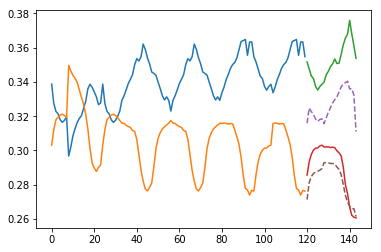

In [9]:
TARGET = 200

model.training = False
pred = model(inp, None)
model.training = True

plt.figure()
plt.plot(range(120), np.reshape(np.transpose(inp[TARGET,:,:5]), (-1)))
plt.plot(range(120), np.reshape(np.transpose(inp[TARGET,:,5:]), (-1)))

plt.plot(range(120, 144), np.array(target)[TARGET])
plt.plot(range(120, 144), np.array(pred[0])[TARGET], '--')
plt.plot(range(120, 144), np.array(pred[1])[TARGET], '--')
plt.show()

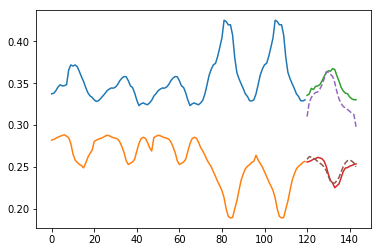

In [10]:
TARGET = 400

model.training = False
pred = model(inp, None)
model.training = True

plt.figure()
plt.plot(range(120), np.reshape(np.transpose(inp[TARGET,:,:5]), (-1)))
plt.plot(range(120), target[TARGET-120:TARGET,0,1])

plt.plot(range(120, 144), np.array(target)[TARGET])
plt.plot(range(120, 144), np.array(pred[0])[TARGET], '--')
plt.plot(range(120, 144), np.array(pred[1])[TARGET], '--')
plt.show()